# Seattle Airbnb Open Data Analys





## Data Description：
since 2008,guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

#### My Blog Link
https://helloxms.github.io/2020/02/26/Seattle-Airbnb-Open-Data-Analysis/

## 1. Get Data:
The following Airbnb activity is included in this Seattle dataset:
Listings, including full descriptions and average review score
Reviews, including unique id for each reviewer and detailed comments
Calendar, including listing id and the price and availability for that day

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%matplotlib inline

listings = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv')
reviews = pd.read_csv('reviews.csv')

In [3]:
listings.sample(2,random_state=42)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2562,8505940,https://www.airbnb.com/rooms/8505940,20160104002432,2016-01-04,Cozy room near UW,This 1918 house in the Montlake district is lo...,This beautiful 1918 home in the Montlake distr...,This 1918 house in the Montlake district is lo...,none,Montlake is a fashionable residential neighbor...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.20
1425,5270886,https://www.airbnb.com/rooms/5270886,20160104002432,2016-01-04,"Walk To Space Needle, Pike Place S7",Experience Seattle's ultimate urban condo livi...,NaN,Experience Seattle's ultimate urban condo livi...,none,Close to everything including: * The Space Ne...,...,9.0,f,NaN,WASHINGTON,f,strict,f,t,3,1.53


In [4]:
print("listings columns:")
print(listings.columns)
print(listings.shape)
print("calendar columns:")
print(calendar.columns)
print(calendar.shape)
print("reviews columns:")
print(reviews.columns)
print(reviews.shape)

listings columns:
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_typ

###### listings columns:

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'license', 'jurisdiction_names', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month']s
       
(3818, 92)


###### calendar columns:
['listing_id', 'date', 'available', 'price']
(1393570, 4)


###### reviews columns:
['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments']
(84849, 6)

In [5]:
print(calendar.columns)
print(calendar.shape)
print(calendar.dtypes)
print(calendar['price'].head(100))

Index(['listing_id', 'date', 'available', 'price'], dtype='object')
(1393570, 4)
listing_id     int64
date          object
available     object
price         object
dtype: object
0     $85.00
1     $85.00
2        NaN
3        NaN
4        NaN
       ...  
95    $85.00
96    $85.00
97    $85.00
98    $85.00
99    $85.00
Name: price, Length: 100, dtype: object


###### transfer calendar's price,available params's data type to numeric type

In [6]:
def str_obj_to_number( str_obj):
    if len(str(str_obj))>0:
        str_obj = str(str_obj).replace(',', '').split('$')[-1]
        number = float(str_obj )
    else:
        print(str_obj)
        number = None
    return number

def booleans_to_number( s):
    if s == 'f':
        return 0
    elif s == 't':
        return 1
    return None

In [7]:
print("calendar.price dtype is :{}".format(calendar['price'].dtype))
print("calendar.available dtype is :{}".format(calendar['available'].dtype))
calendar['price'] = calendar['price'].apply(str_obj_to_number)
calendar['available'] = calendar['available'].apply(booleans_to_number)
print("calendar.price dtype is :{}".format(calendar['price'].dtype))
print("calendar.available dtype is :{}".format(calendar['available'].dtype))
#calendar[calendar['listing_id'] == 8666707 & calendar['price'].notnull() ]
print("calendar:shape: {}".format(calendar.shape))



calendar.price dtype is :object
calendar.available dtype is :object
calendar.price dtype is :float64
calendar.available dtype is :int64
calendar:shape: (1393570, 4)


In [8]:
calendar_listing_id_list = calendar['listing_id'].value_counts()
print(calendar_listing_id_list.shape)
print(calendar_listing_id_list.describe())

(3818,)
count    3818.0
mean      365.0
std         0.0
min       365.0
25%       365.0
50%       365.0
75%       365.0
max       365.0
Name: listing_id, dtype: float64


###### we can get some info from calendar data :
- there are 3818 listing ids in Calendar data
- every listing ids have 365 days's record
- some listing ids are NOT available all year，some are available all year

In [9]:
available_days = {}
available_days['listing_id'] = []
available_days['days'] = []

In [10]:
for i in range(0, calendar_listing_id_list.shape[0]):
    sample = calendar.loc[calendar['listing_id'] == calendar_listing_id_list.index[i] ]
    available_days['listing_id'].append(calendar_listing_id_list.index[i])
    available_days['days'].append(sample['price'].notnull().sum())
    

In [11]:
df1 = pd.DataFrame(available_days )
df1 = df1.sort_values('days',axis = 0,ascending = True)
data = df1['days']
mean_days = df1['days'].mean()
print(mean_days)

244.7726558407543


###### About available days
There are about 245 days available for rent, about 120 days are rented.


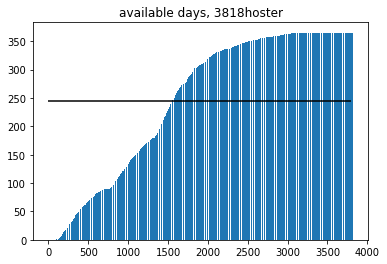

In [12]:
plt.bar(range(len(data)), data)
plt.title("available days, 3818hoster")
y=mean_days
plt.hlines(y, 0, 3800)
plt.show()

In [13]:
print(reviews.columns)
print(reviews.shape)
print(reviews.dtypes)

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')
(84849, 6)
listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object


In [14]:

def find_listing_id_in_calendars( raw ):
    if raw.listing_id in calendar_listing_id_list.index:
        return True
    else:
        return False
    
finding_list = reviews.apply(find_listing_id_in_calendars, axis = 1)

reviewer_count = reviews.listing_id.unique()
print( finding_list.value_counts().sum() == reviews.shape[0])
print( len(reviewer_count))

True
3191


##### Are all reviews data's listing ids in calendar data's listing ids? Answer is : True
all reviews data's listing_id is in calendar

reviewer dataframe's listing id size is 3191

In [15]:
listing_data_id_list = listings['id'].unique()
print(len(listing_data_id_list))

3818


In [16]:

reviews_listing_id_list = reviews['listing_id'].value_counts()
def find_listing_id_2( raw ):
    if raw.id in reviews_listing_id_list.index:
        return True
    else:
        return False
finding_list = listings.apply(find_listing_id_2, axis = 1)
finding_list.describe()
finding_list.value_counts()
percentage_of_review = 3191*1.0/3818
print(percentage_of_review)

0.8357778941854374


In [17]:
reviews_listing_id_list = reviews['listing_id'].value_counts()
missed_listing_id_list = list()
for i in range(0,calendar_listing_id_list.shape[0] ):
    if calendar_listing_id_list.index[i] not in reviews_listing_id_list.index:
        missed_listing_id_list.append(calendar_listing_id_list.index[i] )

missed_listing_id_df = pd.DataFrame({"listing_id":missed_listing_id_list} ,columns=['listing_id'], dtype=np.int64)

missed_listing_id_df['days'] = [0 for i in range(len(missed_listing_id_df))]

for i in range(0,missed_listing_id_df.shape[0]):
    x = missed_listing_id_df['listing_id'][i]
    missed_listing_id_df['days'][i] = available_days['days'][i]
    
print(missed_listing_id_df.head())

   listing_id  days
0    10310373   290
1     9280767   144
2     9910189   365
3     8989807   352
4     9497431   351


246.23923444976077


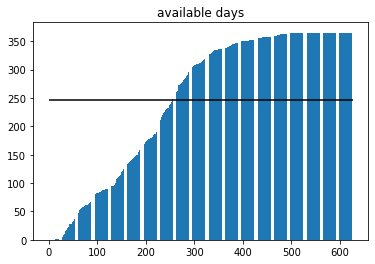

In [18]:

missed_listing_id_df = missed_listing_id_df.sort_values('days',axis = 0,ascending = True)
data = missed_listing_id_df['days']
mean_days = missed_listing_id_df['days'].mean()
print(mean_days)
plt.bar(range(len(data)), data)
plt.title("available days")
y=mean_days
plt.hlines(y, 0, len(missed_listing_id_df))
plt.show()

###### Conclusion
We get 627 listing ids in calendar data and NOT listed in reviews data

We can see, the available days data distribution above are similar to the reviews data.

the tenants reviewed on the rental are no specific reason.

## 2: Clean Data  

###### 2.1 Deal with null value

find the most missing columns

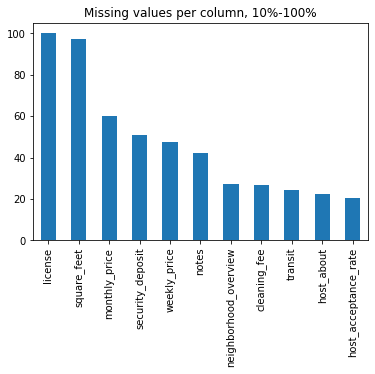

In [19]:
#find percentage of missing values for each column
listings_missing_percent = listings.isnull().mean()*100

#filter out only columns, which have missing values
listings_mis_columns = listings_missing_percent[listings_missing_percent > 20].sort_values(ascending=False)

#plot the results
listings_mis_columns.plot.bar(title='Missing values per column, 10%-100%')

In [20]:
(listings[['weekly_price', 'transit', 'square_feet', 'security_deposit', 'notes',
       'neighborhood_overview', 'monthly_price', 'license',
       'host_acceptance_rate', 'host_about', 'cleaning_fee']].isnull().sum()/len(listings)).sort_values(ascending=False)

license                  1.000000
square_feet              0.974594
monthly_price            0.602672
security_deposit         0.511262
weekly_price             0.473808
notes                    0.420639
neighborhood_overview    0.270299
cleaning_fee             0.269775
transit                  0.244631
host_about               0.224987
host_acceptance_rate     0.202462
dtype: float64

**These params's missing value is bigger than 20%:**

'license','square_feet', 'monthly_price', 'security_deposit','weekly_price',
 'notes','neighborhood_overview', 'cleaning_fee', 'transit', 
 'host_about', 'host_acceptance_rate',


2.1.1 drop 'license','monthly_price','weekly_price'

we drop the license column,for it is unrelated to the rent price,
monthly_price,weekly_price are similar to the price, and they missed value too much, so we can drop them too.

2.1.2 fill 'security_deposit' columns

we can assume 'security_deposit' is default 0

2.1.3 drop 'square_feet','nots', their missing rate are bigger than 40%



In [21]:
listings['price'].isnull().sum()

0

In [22]:
listings['price']= listings['price'].apply(str_obj_to_number)
listings['security_deposit'] = listings['security_deposit'].apply(str_obj_to_number)
listings['security_deposit'] = listings['security_deposit'].fillna(0)
listings['cleaning_fee'] = listings['cleaning_fee'].apply(str_obj_to_number)
listings['cleaning_fee'] = listings['cleaning_fee'].fillna(0)


In [23]:
#drop license
listings.drop(columns=['license'],inplace=True)
#drop weekly_price, monthly_price columns
listings.drop(columns=['weekly_price','monthly_price'],inplace=True)

#fill security_deposit, cleaning_fee columns is default 0
listings['security_deposit']=listings['security_deposit'].fillna(0)
listings['cleaning_fee']=listings['cleaning_fee'].fillna(0)
#missing value rate are bigger than 40%
listings.drop(columns=['square_feet','notes'],inplace=True)

2.1.4 drop one unique value columns

they can not help us predict rent price，they have no change factors.

2.1.5 drop some string type data

If they cann't transfer to numeric, such as url address, host description etc.

2.1.5 drop some columns are unrelated to the rent price

such as host_col,other_col_1,other_col_2 listed below etc.


In [24]:
#one  unique columns
one_unique=[col for col in listings.columns.values if listings[col].nunique()==1]
print( one_unique)

#find columns containing 'url' in the name
url_col=[col for col in listings.columns.values if 'url' in col]
print(url_col)
#host description
host_col = ['host_id', 'host_name', 'host_since', 'host_location', 'host_about', 'host_verifications']
print(host_col)

['scrape_id', 'last_scraped', 'experiences_offered', 'market', 'country_code', 'country', 'has_availability', 'calendar_last_scraped', 'requires_license', 'jurisdiction_names']
['listing_url', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url']
['host_id', 'host_name', 'host_since', 'host_location', 'host_about', 'host_verifications']


In [25]:

one_unique = ['scrape_id', 'last_scraped', 'experiences_offered', 'market',
               'country_code', 'country', 'has_availability', 'calendar_last_scraped', 'requires_license', 'jurisdiction_names']

url_col = ['listing_url', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url',
           'host_thumbnail_url', 'host_picture_url']

host_col = ['host_id', 'host_name', 'host_since', 'host_location', 'host_about', 'host_verifications']

other_col_1 = ['city','state','first_review','last_review','street',
           'zipcode','smart_location','calendar_updated',
           'cleaning_fee','extra_people']

other_col_2 = ['id', 'latitude', 'longitude']


In [26]:
#drop columns from dataset
listings.drop(columns=one_unique,inplace=True)
listings.drop(columns=url_col,inplace=True)
listings.drop(columns=host_col, inplace=True)
listings.drop(columns=other_col_1, inplace=True)
listings.drop(columns=other_col_2, inplace=True)

In [27]:
listings['host_response_rate'] = listings['host_response_rate'].str.rstrip('%').astype('float') / 100.0
listings['host_response_rate'] = listings['host_response_rate'].fillna(listings['host_response_rate'].mean())
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].fillna(listings['host_acceptance_rate'].mean())

In [28]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numlist = listings.select_dtypes(include=numerics)
numlist_ = numlist.fillna(numlist.mean())
numlist_.describe()


,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,security_deposit,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,...,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,0.948868,0.999672,7.157757,7.157757,3.349398,1.259469,1.307712,1.735394,127.976166,140.566003,...,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.946307,2.078919
std,0.110238,0.016183,28.620648,28.620648,1.977599,0.589130,0.882700,1.139330,90.250022,237.387534,...,37.730892,6.020223,0.635022,0.725880,0.541745,0.517493,0.572542,0.682751,5.893029,1.665964
min,0.170000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,20.000000,0.000000,...,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,0.020000
25%,0.948868,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,75.000000,0.000000,...,2.000000,94.000000,9.636392,9.000000,9.786709,9.809599,9.000000,9.000000,1.000000,0.830000
50%,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,100.000000,0.000000,...,9.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.452245,1.000000,2.000000
75%,1.000000,1.000000,3.000000,3.000000,4.000000,1.000000,2.000000,2.000000,150.000000,200.000000,...,26.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.660000
max,1.000000,1.000000,502.000000,502.000000,16.000000,8.000000,7.000000,15.000000,1000.000000,5000.000000,...,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,37.000000,12.150000


In [29]:
obj_type = ['object']
catlist = listings.select_dtypes(include=obj_type)
catlist.describe()


,name,summary,space,description,neighborhood_overview,transit,host_response_time,host_is_superhost,host_neighbourhood,host_has_profile_pic,...,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,bed_type,amenities,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,3818,3641,3249,3818,2786,2884,3295,3816,3518,3816,...,3818,3818,3817,3818,3818,3818,3818,3818,3818,3818
unique,3792,3478,3119,3742,2506,2574,4,2,102,2,...,17,2,16,3,5,3284,2,3,2,2
top,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,Wallingford is a mostly-residential neighborho...,Convenient public transportation. The location...,within an hour,f,Capitol Hill,t,...,Other neighborhoods,t,House,Entire home/apt,Real Bed,{},f,strict,f,f
freq,3,15,14,10,17,32,1692,3038,405,3809,...,794,3412,1733,2541,3657,45,3227,1417,3497,3443


In [30]:
for column in catlist.columns:
    print("column: {} \t have unique value size:{}".format(column, len(catlist[column].unique()) ))
          

column: name 	 have unique value size:3792
column: summary 	 have unique value size:3479
column: space 	 have unique value size:3120
column: description 	 have unique value size:3742
column: neighborhood_overview 	 have unique value size:2507
column: transit 	 have unique value size:2575
column: host_response_time 	 have unique value size:5
column: host_is_superhost 	 have unique value size:3
column: host_neighbourhood 	 have unique value size:103
column: host_has_profile_pic 	 have unique value size:3
column: host_identity_verified 	 have unique value size:3
column: neighbourhood 	 have unique value size:82
column: neighbourhood_cleansed 	 have unique value size:87
column: neighbourhood_group_cleansed 	 have unique value size:17
column: is_location_exact 	 have unique value size:2
column: property_type 	 have unique value size:17
column: room_type 	 have unique value size:3
column: bed_type 	 have unique value size:5
column: amenities 	 have unique value size:3284
column: instant_book

###### 2.2 Categorical Data

2.2.1 remove redundant object type columns

such as  'name','summary','space','description','neighborhood_overview', 'transit', 'host_neighbourhood', 
'neighbourhood', 'neighbourhood_cleansed'

their unique value count are too much.





In [31]:
other_col_3 = ['name', 'summary', 'space', 'description','neighborhood_overview', 'transit', 
              'host_neighbourhood','neighbourhood', 'neighbourhood_cleansed' ]
listings.drop(columns=other_col_3, inplace=True)



In [32]:
category = ['object']
catlist = listings.select_dtypes(include=category)
catlist.describe()

,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,bed_type,amenities,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,3295,3816,3816,3816,3818,3818,3817,3818,3818,3818,3818,3818,3818,3818
unique,4,2,2,2,17,2,16,3,5,3284,2,3,2,2
top,within an hour,f,t,t,Other neighborhoods,t,House,Entire home/apt,Real Bed,{},f,strict,f,f
freq,1692,3038,3809,2997,794,3412,1733,2541,3657,45,3227,1417,3497,3443


In [33]:
#encode categorical variables
binary_cols = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact',
             'instant_bookable', 'require_guest_profile_picture','require_guest_phone_verification']
catlist[binary_cols] = np.where(catlist[binary_cols]=='t', 1, 0)

encode_cols = ['host_response_time','neighbourhood_group_cleansed',
             'property_type','room_type','bed_type','cancellation_policy']

catlist = pd.get_dummies(data=catlist, columns=encode_cols,drop_first=True)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3498: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stab

 2.2.2 about amenities

split all the amenites into key words, and remove the punctuation;
create key words columns list;

In [34]:
def str_to_key_words( str_obj):
    result = str(str_obj).replace("{", '')
    result = str(result ).replace("}", '')
    result = result.split(',')
    return result

amenities_df = catlist['amenities']

amenities_array=catlist['amenities'].apply(str_to_key_words)
amenities_df.head()

amenities_key_words = []
for i in range(0, len(amenities_array)):
    for j in range(len(amenities_array[i])):
        if amenities_array[i][j] not in amenities_key_words:
            amenities_key_words.append(amenities_array[i][j])
            

amenities_key_words.remove('')
print(len(amenities_key_words),amenities_key_words)


41 ['TV', '"Cable TV"', 'Internet', '"Wireless Internet"', '"Air Conditioning"', 'Kitchen', 'Heating', '"Family/Kid Friendly"', 'Washer', 'Dryer', '"Free Parking on Premises"', '"Buzzer/Wireless Intercom"', '"Smoke Detector"', '"Carbon Monoxide Detector"', '"First Aid Kit"', '"Safety Card"', '"Fire Extinguisher"', 'Essentials', '"Pets Allowed"', '"Pets live on this property"', 'Dog(s)', 'Cat(s)', '"Hot Tub"', '"Indoor Fireplace"', 'Shampoo', 'Breakfast', '"24-Hour Check-in"', 'Hangers', '"Hair Dryer"', 'Iron', '"Laptop Friendly Workspace"', '"Suitable for Events"', '"Elevator in Building"', '"Lock on Bedroom Door"', '"Wheelchair Accessible"', 'Gym', 'Pool', '"Smoking Allowed"', '"Other pet(s)"', 'Doorman', '"Washer / Dryer"']


In [35]:
amenities_dic = {}
for i in range(len(amenities_key_words)):
    amenities_dic[amenities_key_words[i]] = []
    for j in range(len(amenities_df)):
        if amenities_key_words[i] in amenities_df[j]:
            amenities_dic[amenities_key_words[i]] .append(1)
        else:
            amenities_dic[amenities_key_words[i]] .append(0)
    print(amenities_key_words[i],sum(amenities_dic[amenities_key_words[i]]))
    

TV 2741
"Cable TV" 1446
Internet 3692
"Wireless Internet" 3667
"Air Conditioning" 677
Kitchen 3423
Heating 3627
"Family/Kid Friendly" 1963
Washer 2992
Dryer 3114
"Free Parking on Premises" 2167
"Buzzer/Wireless Intercom" 538
"Smoke Detector" 3281
"Carbon Monoxide Detector" 2485
"First Aid Kit" 1680
"Safety Card" 727
"Fire Extinguisher" 2196
Essentials 3237
"Pets Allowed" 472
"Pets live on this property" 883
Dog(s) 509
Cat(s) 382
"Hot Tub" 303
"Indoor Fireplace" 886
Shampoo 2670
Breakfast 291
"24-Hour Check-in" 616
Hangers 846
"Hair Dryer" 774
Iron 742
"Laptop Friendly Workspace" 745
"Suitable for Events" 209
"Elevator in Building" 785
"Lock on Bedroom Door" 100
"Wheelchair Accessible" 300
Gym 442
Pool 159
"Smoking Allowed" 82
"Other pet(s)" 51
Doorman 85
"Washer / Dryer" 2


In [36]:
amenities_dummies = pd.DataFrame(amenities_dic)
amenities_dummies.head()

,TV,"""Cable TV""",Internet,"""Wireless Internet""","""Air Conditioning""",Kitchen,Heating,"""Family/Kid Friendly""",Washer,Dryer,...,"""Suitable for Events""","""Elevator in Building""","""Lock on Bedroom Door""","""Wheelchair Accessible""",Gym,Pool,"""Smoking Allowed""","""Other pet(s)""",Doorman,"""Washer / Dryer"""
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
catlist = catlist.join(amenities_dummies, how='left')
listings_clean = pd.concat([numlist_, catlist], axis=1)
listings_clean.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'security_deposit',
       ...
       '"Suitable for Events"', '"Elevator in Building"',
       '"Lock on Bedroom Door"', '"Wheelchair Accessible"', 'Gym', 'Pool',
       '"Smoking Allowed"', '"Other pet(s)"', 'Doorman', '"Washer / Dryer"'],
      dtype='object', length=118)

## Question1

Can you describe the vibe of each Seattle neighborhood using listing descriptions?

In [38]:
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk import FreqDist
from nltk.corpus import stopwords

listings_ = pd.read_csv('listings.csv')
listings_n = listings_[['neighbourhood_group_cleansed', 'neighborhood_overview'] ]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xumingsheng\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
neighborhood_array = listings_['neighbourhood_group_cleansed'].unique()
print(listings_['neighbourhood_group_cleansed'].unique())


['Queen Anne' 'Ballard' 'Other neighborhoods' 'Cascade' 'Central Area'
 'University District' 'Downtown' 'Magnolia' 'West Seattle' 'Interbay'
 'Beacon Hill' 'Rainier Valley' 'Delridge' 'Seward Park' 'Northgate'
 'Capitol Hill' 'Lake City']


In [48]:

neighborhood_dict = {}
for i in range(len(neighborhood_array)):
    neighborhood_dict[neighborhood_array[i]] = ""
        
for i in range(len(listings_n)):
        area_name = listings_n['neighbourhood_group_cleansed'][i]
        text = listings_n['neighborhood_overview'][i]
        text_ = str(text).lower()
        text_ = str(text_).replace(',', '')
        text_ = str(text_).replace('.', '')
        neighborhood_dict[area_name] += " "
        neighborhood_dict[area_name] += text_
        
        
filt_array =['nan', 'neighborhood', 'seattle', 'one', 'great', 'also', '-','&', "seattle's",'10','-seattle','away','•',
             '5','*', 'many', 'around', 'minute','located', ]

feature_dic = {}

features = ['downtown','center', 'restaurants','grocery', 'shops', 'market','stores','blocks', 'coffee', 'bars', 'food',
            'hill','park','lake', 'beach', 'museum','art' ]
for i in range(len(features)):
    feature_dic[features[i]] = []
        
for i in range(len(neighborhood_array)):  
    area_name = neighborhood_array[i]
    words = neighborhood_dict[area_name]
    tokens = [t for t in words.split()]
    
    clean_tokens = tokens[:]
    sr = stopwords.words('english')
    for token in tokens:
        if token in stopwords.words('english'):
            clean_tokens.remove(token)
        if token in filt_array:
            clean_tokens.remove(token)
            
    for token in clean_tokens:
        text_ = str(text).lower()
        text_ = str(text_).replace('shopping', 'shops')
        text_ = str(text_).replace('shop', 'shops')
        text_ = str(text_).replace('walking', 'walk')
        text_ = str(text_).replace('parks', 'park')
        text_ = str(text_).replace('street', 'blocks')
        text_ = str(text_).replace('city', 'downtown')
            
    fdist1 = FreqDist(clean_tokens)
    print(area_name, [i[0] for i in fdist1.most_common(40)])

    for i in range(len(features)):
        feature_dic[features[i]].append( int(fdist1.freq(features[i])*10000) )
        

features_df = pd.DataFrame(feature_dic)
for i in range(len(neighborhood_array)):  
    area_name = neighborhood_array[i]
    features_df.rename(index={i : area_name },inplace=True)
print(features_df)


Queen Anne ['queen', 'anne', 'downtown', 'walk', 'restaurants', 'center', 'hill', 'shops', 'space', 'needle', 'park', 'coffee', 'views', 'blocks', 'lower', 'close', 'market', 'place', 'walking', 'within', 'fremont', 'lake', 'minutes', 'bus', 'bars', 'museum', 'best', 'kerry', 'union', 'stores', 'city', 'drive', 'distance', 'quiet', 'south', 'beautiful', 'easy', 'access', 'top', 'home']
Ballard ['ballard', 'restaurants', 'walk', 'downtown', 'market', 'golden', 'bars', 'gardens', 'locks', 'shops', 'park', 'blocks', 'within', 'beach', 'walking', 'coffee', 'minutes', 'home', 'best', 'close', 'bus', 'farmers', 'street', 'parks', 'distance', 'city', 'music', 'quiet', 'neighborhoods', 'sunday', 'easy', 'area', 'drive', 'amazing', 'bike', 'food', 'grocery', 'fremont', 'local', 'old']
Other neighborhoods ['restaurants', 'park', 'fremont', 'lake', 'walk', 'downtown', 'shops', 'walking', 'blocks', 'university', 'coffee', 'within', 'green', 'bars', 'wallingford', 'ballard', 'close', 'distance', 'g

In [49]:
features_df

,downtown,center,restaurants,grocery,shops,market,stores,blocks,coffee,bars,food,hill,park,lake,beach,museum,art
Queen Anne,155,129,143,34,95,65,43,69,72,46,24,100,75,57,8,46,18
Ballard,120,21,192,35,77,105,32,66,61,90,36,16,74,23,63,2,7
Other neighborhoods,100,35,169,49,97,41,32,82,75,67,27,18,151,138,23,4,11
Cascade,164,24,176,48,66,42,18,103,79,72,36,91,60,291,6,12,0
Central Area,118,45,148,29,78,42,16,112,74,51,58,175,87,84,28,16,33
University District,72,27,173,13,166,34,24,72,48,20,27,0,58,62,0,13,20
Downtown,167,139,130,17,50,125,11,153,28,63,18,69,32,14,3,55,93
Magnolia,200,62,96,34,48,34,34,41,55,13,20,0,221,0,13,6,6
West Seattle,127,0,167,51,89,49,32,64,60,45,17,34,106,0,260,0,9
Interbay,121,30,152,60,152,30,0,30,91,0,0,60,60,0,60,30,0


In [52]:
#features2_df = features_df.copy()
features2_df = pd.DataFrame()
features2_df['living'] = features_df.apply(lambda x: x['downtown'] + x['center'] + x['restaurants'], axis = 1)
features2_df['shopping'] = features_df.apply(lambda x: x['grocery'] + x['shops'] + x['market']+ x['stores'] + x['blocks'], axis = 1)
features2_df['catering'] = features_df.apply(lambda x: x['coffee'] + x['food'] + x['bars'], axis = 1)
features2_df['leisure'] = features_df.apply(lambda x: x['hill'] + x['park'] + x['lake']+ x['beach'], axis = 1)
features2_df['museum'] = features_df.apply(lambda x: x['museum'] + x['art'] , axis = 1)

#In every category, datas are averaged to 0 -100
#normalize all data to 0-1

features2_df

,living,shopping,catering,leisure,museum
Queen Anne,427,306,142,240,64
Ballard,333,315,187,176,9
Other neighborhoods,304,301,169,330,15
Cascade,364,277,187,448,12
Central Area,311,277,183,374,49
University District,272,309,95,120,33
Downtown,436,356,109,118,148
Magnolia,358,191,88,234,12
West Seattle,294,285,122,400,9
Interbay,303,272,91,180,30


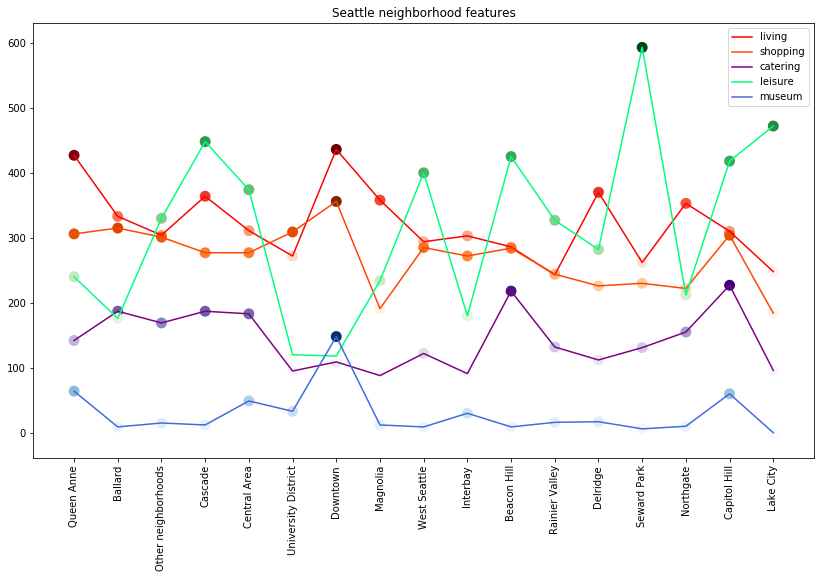

In [90]:
from matplotlib import cm
fig, ax = plt.subplots(figsize=(14,8))


ln1, = ax.plot(range(len(features2_df)), features2_df['living'],color='red')
ax.scatter(range(len(features2_df)), features2_df['living'], c=features2_df['living'], 
           s=120, cmap=cm.get_cmap('Reds'), edgecolor='None')

ln2, = ax.plot(range(len(features2_df)), features2_df['shopping'], color='orangered')
ax.scatter(range(len(features2_df)), features2_df['shopping'], c=features2_df['shopping'], 
           s=120, cmap=cm.get_cmap('Oranges'), edgecolor='None')

ln3, = ax.plot(range(len(features2_df)), features2_df['catering'], color='purple')
ax.scatter(range(len(features2_df)), features2_df['catering'], c=features2_df['catering'], 
           s=120, cmap=cm.get_cmap('Purples'), edgecolor='None')

ln4, = ax.plot(range(len(features2_df)), features2_df['leisure'], color='springgreen')
ax.scatter(range(len(features2_df)), features2_df['leisure'], c=features2_df['leisure'], 
           s=120, cmap=cm.get_cmap('Greens'), edgecolor='None')

ln5, = ax.plot(range(len(features2_df)), features2_df['museum'],  color='royalblue')
ax.scatter(range(len(features2_df)), features2_df['museum'], c=features2_df['museum'], 
           s=120, cmap=cm.get_cmap('Blues'), edgecolor='None')

plt.xticks(range(len(features2_df)), features2_df.index, rotation =90)
plt.legend(handles=[ln1,ln2,ln3,ln4,ln5],labels=['living','shopping', 'catering','leisure', 'museum' ])
plt.title("Seattle neighborhood features")
plt.show()

### Conclusion

we select 17 key words about living, shopping, catering, leisure, Museum.

- living is: downtown,center,restaurants

- shopping is: grocery,shops, market, stores, blocks

- catering is: coffee, food,bars

- leisure is: hill, park, lake, beach,museum

- Museum is: museum,art

Then we parse neighborhood_overview data,and get every Seattle neighborhood describe's key words.

For airbnb customers Queen Anne and Downtown are good at living and shopping, museum art.

Seward park, Lake City, Cascade are good at leisure. Capitol Hill and Beacon Hill are good at catering.

Also, there are some remarkable features, such as space needle,university, West Seattle's beach, Cascade's lake,

Capitol Hill's bars, Ballard's restaurants etc.




## Question2

What are the main factors affecting house prices?

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns


X = listings_clean.drop( ['price','amenities'] ,axis=1)
listings_clean_df = X
y = listings_clean['price']
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
#print(listings_clean_df.columns.values)

In [84]:
def parse_var_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

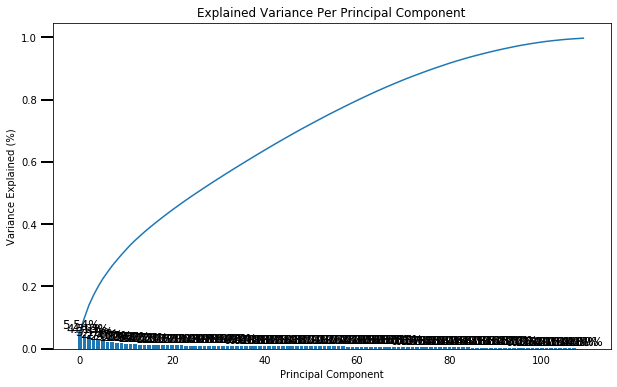

In [85]:
pca = PCA(n_components=110)
pca.fit(rescaledX)
parse_var_plot(pca)

In [99]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.

def interpetPCA(pca, df_columns, dimOfInterest, showFeat):
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 5), columns = df_columns)

    # PCA explained variance per dimension
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])

    pcaDf = pd.concat([variance_ratios, components], axis = 1)

    #look at single dimension
    singleComp = components.iloc[dimOfInterest,:]
    topComp = singleComp.sort_values(ascending=False)[0:showFeat].to_frame().transpose()
    bottomComp = singleComp.sort_values(ascending=True)[0:showFeat].to_frame().transpose()
    # singleComp = pd.concat([topComp, bottomComp], axis=1)
    print(topComp)
    print(bottomComp)

In [100]:
pca = PCA(n_components=116) 
pca.fit(rescaledX)


# Map weights for the first principal component to corresponding feature names
interpetPCA(pca, listings_clean_df.columns.values, 0, 4 )
# Map weights for the second principal component to corresponding feature names
interpetPCA(pca, listings_clean_df.columns.values, 1, 4 )
# Map weights for the third principal component to corresponding feature names
interpetPCA(pca, listings_clean_df.columns.values, 2, 4 )
# Map weights for the fourth principal component to corresponding feature names
interpetPCA(pca, listings_clean_df.columns.values, 3, 4 )

   "Hair Dryer"     Iron  Hangers  "24-Hour Check-in"
0       0.24727  0.24574  0.23945             0.21966
   room_type_Private room  "Pets live on this property"  property_type_House  \
0                -0.14438                      -0.07149              -0.0692   

   cancellation_policy_moderate  
0                      -0.05214  
   "Elevator in Building"  neighbourhood_group_cleansed_Downtown      Gym  \
1                 0.19084                                0.18585  0.16508   

   calculated_host_listings_count  
1                         0.16481  
   review_scores_rating  review_scores_value  review_scores_checkin  \
1              -0.27108             -0.26231               -0.24147   

   review_scores_accuracy  
1                -0.24102  
   bedrooms  accommodates     beds  bathrooms
2   0.34236       0.31772  0.31165    0.25437
   reviews_per_month  Hangers  "Hair Dryer"     Iron
2           -0.17816 -0.15216      -0.14907 -0.14269
   availability_90  availability_60  av

In [53]:
X_train, X_test, y_train, y_test = train_test_split(pcadata, y, test_size=0.25, random_state=42)
lnmodel = LinearRegression(normalize=True)
lnmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [54]:
y_test_pred = lnmodel.predict(X_test)
y_train_pred = lnmodel.predict(X_train)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 3448.003, test: 3722.263
R^2 train: 0.573, test: 0.554


In [55]:
#Write a function to report performance of the model
def model_perf(Xdata,component_low,component_high,model):
    mse_train = list()
    mse_test = list()
    r2_train = list()
    r2_test = list()
    for i in range(component_low,component_high):
        pca = PCA(n_components=i) 
        pca.fit(Xdata)
        pcadata = pca.fit_transform(Xdata)
        X_train, X_test, y_train, y_test = train_test_split(pcadata, y, test_size=0.25, random_state=42)
        model.fit(X_train,y_train)
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)
        mse_train.append(mean_squared_error(y_train, y_train_pred))
        mse_test.append(mean_squared_error(y_test, y_test_pred))
        r2_train.append(r2_score(y_train, y_train_pred))
        r2_test.append(r2_score(y_test, y_test_pred))
    x = range(component_low,component_high)
    plt.plot(x,mse_train,color='black')
    plt.plot(x,mse_test,color='blue')
    plt.show()

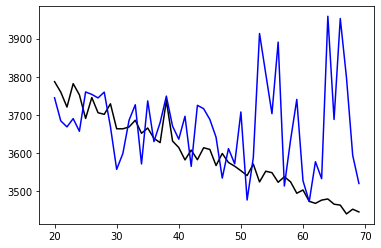

In [65]:
lnmodel = LinearRegression(normalize=True)
model_perf(rescaledX,20,70,lnmodel)

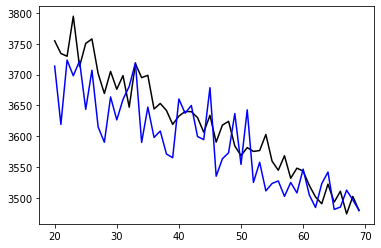

In [66]:
lassomodel = linear_model.Lasso(alpha=0.8)
model_perf(rescaledX,20,70,lassomodel)

In [67]:
pca = PCA(n_components=70) 
pca.fit(rescaledX)
pcadata = pca.fit_transform(rescaledX)
pca.explained_variance_ratio_.sum()
lassomodel = linear_model.Lasso(alpha=0.8)
lassomodel.fit(X_train, y_train)
y_train_pred = lassomodel.predict(X_train)
y_test_pred = lassomodel.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 3485.192, test: 3473.262
R^2 train: 0.568, test: 0.584


### Conclusion

Here, we build a model function and tried two different models including linear regression and lasso regression, we found that by evluating using mse score, lasso-regression performs the best out of the other models and the result is more consistent.
And we further tuning this parameter, and set the alpha to be at 0.8, the final model reports that the mse on test set is 3473, and R-square is 0.584.

Through PCA analysis, we can get 4 kinds of positive facts:
1. "Hair Dryer", Iron, Hangers,  "24-Hour Check-in"
2. "Elevator in Building", neighbourhood_group_cleansed_Downtown, Gym, calculated_host_listings_count
3. bedrooms, accommodates, beds, bathrooms
4. availability_90,  availability_60,  availability_30,  availability_365

and private house property， pet living in property， some review scores are negtive facts.


## question 3: 

When is the best price in a year? Are they effected by seasons?

127.97616553169199


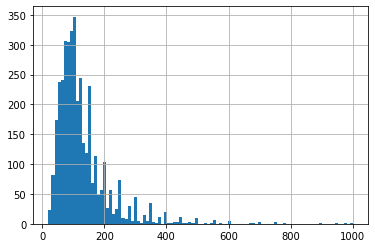

In [92]:
listings_clean['price'].mean()
print(listings_clean['price'].mean())

listings_clean['price'].hist(bins=100)

Rent house's average price is 128.

In [93]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar[['price']] = calendar[['price']].replace('[\$,]','',regex=True).astype(float)
calendar = calendar.dropna()
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,1,85.0
1,241032,2016-01-05,1,85.0
9,241032,2016-01-13,1,85.0
10,241032,2016-01-14,1,85.0
14,241032,2016-01-18,1,85.0


In [94]:
pricedf = calendar.groupby(['date'])['price'].mean()
print(pricedf.resample('M').mean())
print("increase percentage:{}".format((152.0-121.7)/121.69))



date
2016-01-31    121.692505
2016-02-29    124.315614
2016-03-31    128.640797
2016-04-30    135.109460
2016-05-31    139.539566
2016-06-30    147.469191
2016-07-31    152.102977
2016-08-31    150.657032
2016-09-30    143.277182
2016-10-31    137.033871
2016-11-30    135.687825
2016-12-31    137.238611
2017-01-31    136.849867
Freq: M, Name: price, dtype: float64
increase percentage:0.24899334374229598


Text(0.5, 1.0, 'mean price per week')

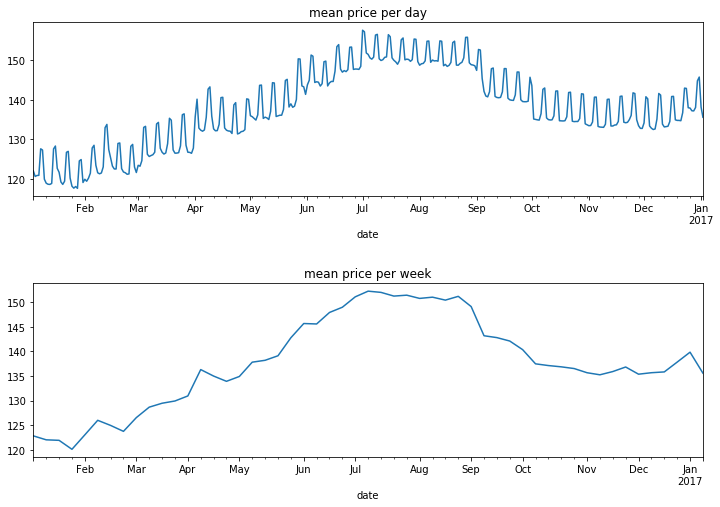

In [104]:
pricedf = calendar.groupby(['date'])['price'].mean()
plt.subplot(211)
pricedf.resample('D').mean().plot(figsize=(12,8))
plt.subplots_adjust(hspace=0.5)
plt.title("mean price per day")
plt.subplot(212)
pricedf.resample('W').mean().plot(figsize=(12,8))
plt.subplots_adjust(hspace=0.5)
plt.title("mean price per week")

### Conclusion

From the above mean price line graphs, we can see the busiest season of Seattle in a year is around summer

the price keeps going from January(average price:122) reached to the peak on July (average price:152). 

The mean of the listing price increased by 24.9% compared the start of the year.